# Introduction

This project will analyze data on the GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import Libraries

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_theme(style='whitegrid') # set theme to be whitegrid

## Preliminary Data Findings

In [2]:
df = pd.read_csv("all_data.csv")
df.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


In [3]:
# Check unique countries.
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [4]:
# Check unique years.
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [5]:
# Check data summary.
print(df.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


In [6]:
# Check data shape.
df.shape

(96, 4)

In [7]:
# Check numerical data.
print(df.select_dtypes(include=[np.number]))

    Year  Life expectancy at birth (years)           GDP
0   2000                              77.3  7.786093e+10
1   2001                              77.3  7.097992e+10
2   2002                              77.8  6.973681e+10
3   2003                              77.9  7.564346e+10
4   2004                              78.0  9.921039e+10
..   ...                               ...           ...
91  2011                              54.9  1.209845e+10
92  2012                              56.6  1.424249e+10
93  2013                              58.0  1.545177e+10
94  2014                              59.2  1.589105e+10
95  2015                              60.7  1.630467e+10

[96 rows x 3 columns]


There are 4 columns (3 numerical data and 1 categorical data) and 96 rows. 
3 of the column names are singular or short form except for the column for life expectancy. For consistency, we will rename this column 

In [8]:
# Rename column.
df = df.rename({"Life expectancy at birth (years)":"LifeExp"}, axis = "columns")
df.head()

,Country,Year,LifeExp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [9]:
# Check missing data.
df.isna().sum(axis=0)

Country    0
Year       0
LifeExp    0
GDP        0
dtype: int64

There is no missing data in this dataset.

## Exploration Data Analysis 

Text(0.5, 8.95999999999998, 'GDP in Trillions of U.S. Dollars')

<Figure size 864x432 with 0 Axes>

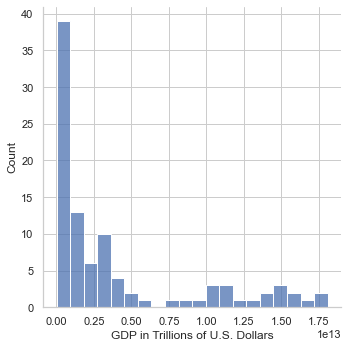

In [10]:
# Check GDP distribution.
plt.figure(figsize=(12, 6))
sns.displot(df.GDP, bins=20, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars")

Text(0.5, 8.95999999999998, 'Life expectancy at birth (years)')

<Figure size 864x432 with 0 Axes>

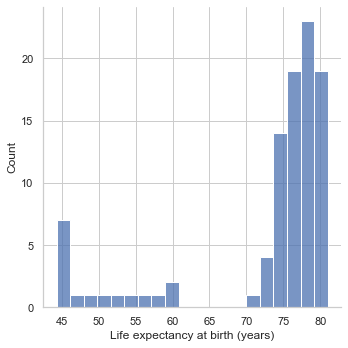

In [11]:
# Check Life Expectancy distribution.
plt.figure(figsize=(12, 6))
sns.displot(df.LifeExp, bins=20, kde=False)
plt.xlabel("Life expectancy at birth (years)")

We can see that the GDP distribution is right-skewed while the life expectancy is left-skewed.
We will next check the distribution by the countries.

<AxesSubplot:xlabel='Country', ylabel='GDP'>

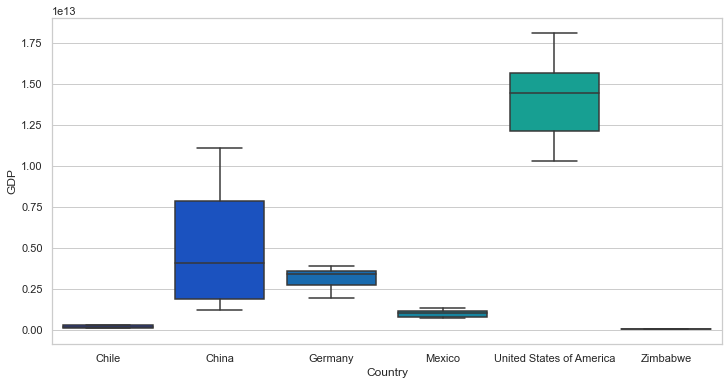

In [12]:
# Check the GDP distribution for each country.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y= 'GDP', data=df, palette='winter')

It was observed China has a widest GDP distribution, followed by USA. USA has a much higher GDP while Zimbawe has a lowest GDP.

<AxesSubplot:xlabel='Country', ylabel='LifeExp'>

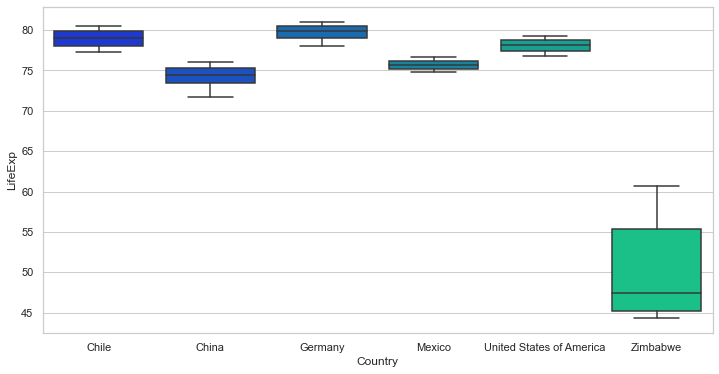

In [13]:
# Check the Life Expectancy distribution for each country.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y= 'LifeExp', data=df, palette='winter')

Zimbabwe has the lowest and widest life expectancy while the other 5 countries have a closer life expectancy. This may explain the left-skewness of the histogram. 

Text(0, 0.5, 'Life expectancy at birth (years)')

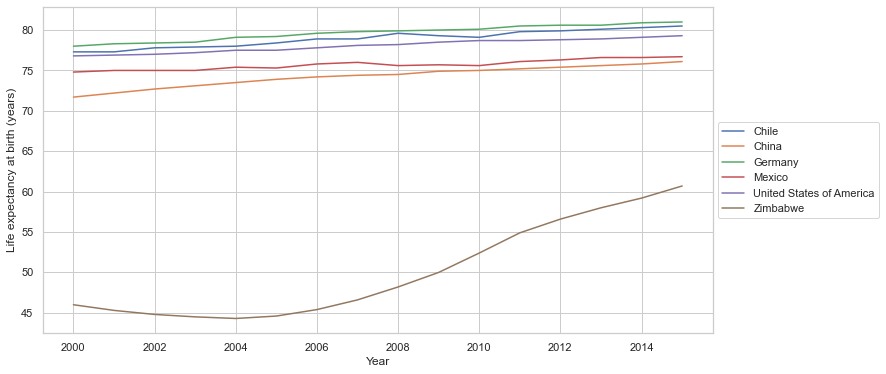

In [14]:
# Check the life expectancy over the years for all the countrires.
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.Year, y=df.LifeExp, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)")

Zimbabwe observed to has an significant increase in the life expectancy from 2006 to 2014. It seems like other countries also have an increase in their life expectancy. We will plot individual line chart for each country to confirm this trend.

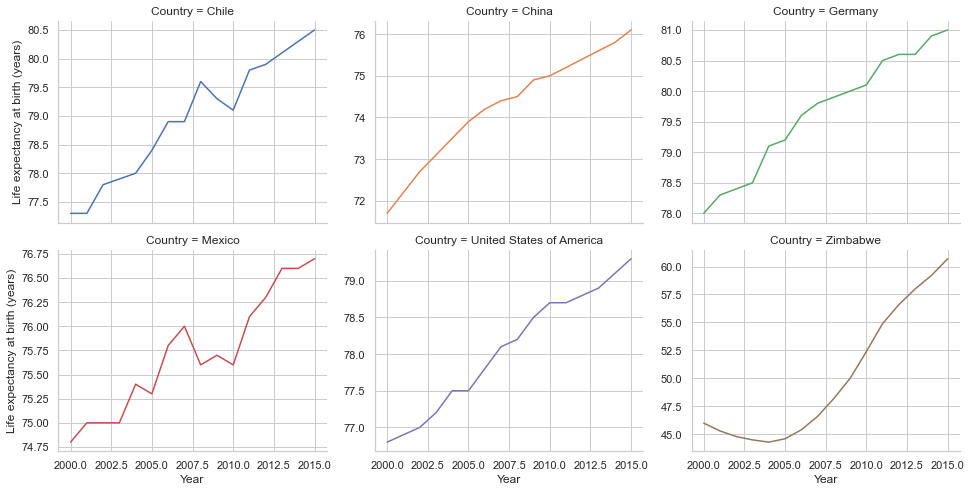

In [15]:
# Plot the life expectancy trend for each country.
LifeExpgraph = sns.FacetGrid(df, col = 'Country', hue = 'Country', col_wrap = 3, sharey = False, height = 3.5, aspect = 1.3)
LifeExpgraph.map_dataframe(sns.lineplot, x='Year', y='LifeExp')
LifeExpgraph.set_axis_labels("Year", "Life expectancy at birth (years)")

Each country has an increase in their life expectancy. There is a dip in the life expectancy for Zimbabwe around 2004 and we may want to consider if to investigate this dip further.

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

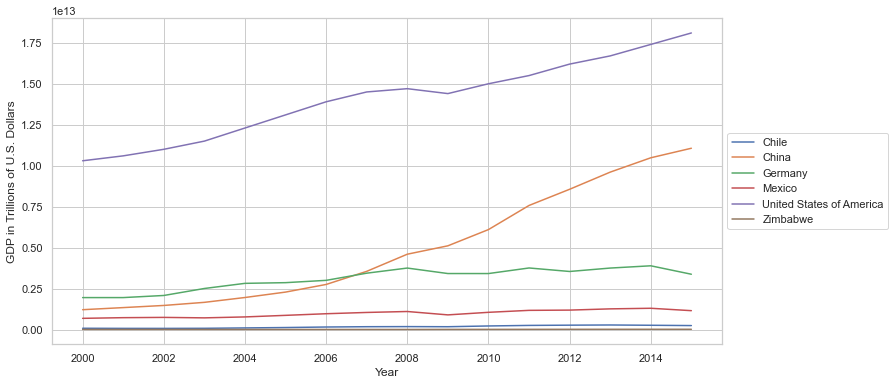

In [16]:
# Check the GDP trend for all the countrires.
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars")

We can see significant GDP increase for China and Chile. Similarly, to confirm the trend for each country, we will plot individual line trend for each country.

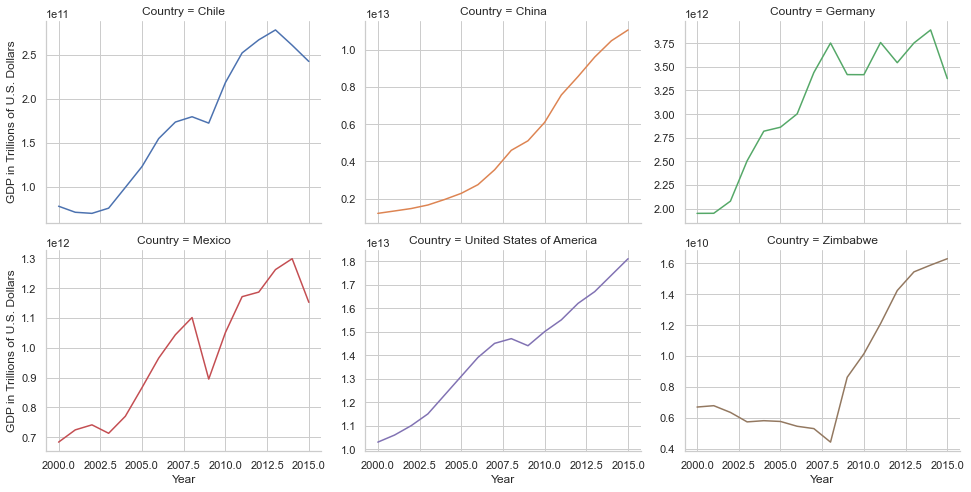

In [17]:
# Plot the GDP trend for each country.
GDPgraph = sns.FacetGrid(df, col = 'Country', hue = 'Country', col_wrap = 3, sharey = False, height = 3.5, aspect = 1.3)
GDPgraph.map_dataframe(sns.lineplot, x='Year', y='GDP')
GDPgraph.set_axis_labels("Year", "GDP in Trillions of U.S. Dollars")

We can see that each country has significant GDP increase. It was observed Zimbabwe has a dip in its GDP in 2007.

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars)')

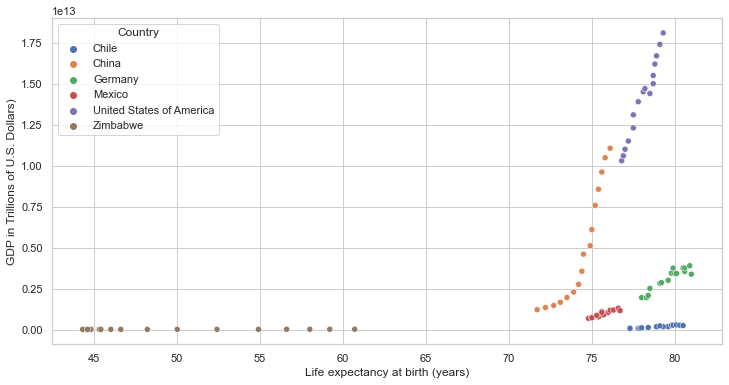

In [18]:
# Check Life Expectancy vs GDP relation.
plt.figure(figsize=(12, 6))
sns.scatterplot(x = 'LifeExp', y = 'GDP', hue = 'Country', data = df)
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("GDP in Trillions of U.S. Dollars)")

We can see that all countries except Zimbabwe seem to show correlation between the life expectancy vs GDP. China and USA seem to have similar slope. Similarly, we will plot individual trends for each country.

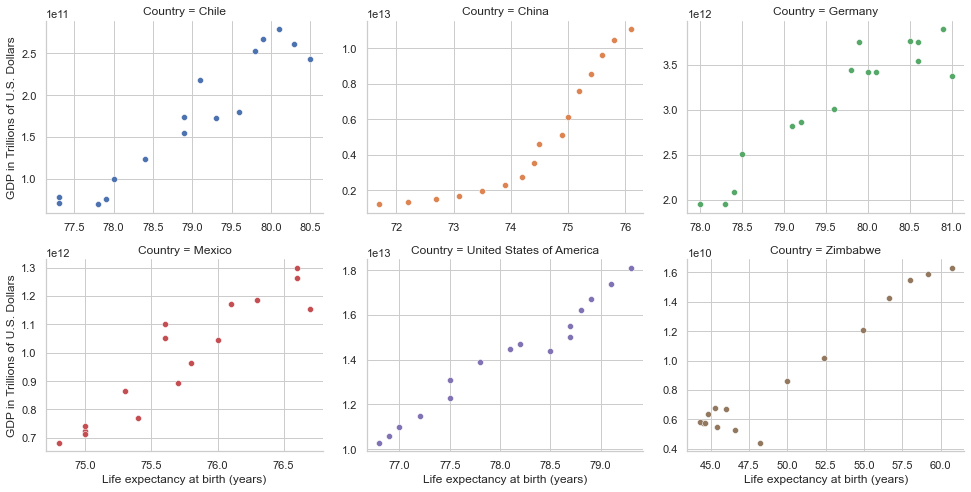

In [19]:
# Plot the Life Expectancy vs GDP trend for each country.
GDPgraph = sns.FacetGrid(df, col = 'Country', hue = 'Country', col_wrap = 3, sharey = False, sharex = False, height = 3.5, aspect = 1.3)
GDPgraph.map_dataframe(sns.scatterplot, x='LifeExp', y='GDP', )
GDPgraph.set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars")

All countries have a positive correlation between GDP and life expectancy. China seem to exhibit a slightly exponential curve, while Chile has a bit of logarithmic curve.

## Conclusion 

We have plotted a few visualizations for this project to answer the below questions posted at the beginning of this project.
+ Has life expectancy increased over time in the six nations?
    Yes, and Zimbabwe was observed to has most significant increase.
+ Has GDP increased over time in the six nations?
    Yes, and China was observed to has most significant increase.
+ Is there a correlation between GDP and life expectancy of a country?
    Yes, all the countries showed a positive correlation
+ What is the average life expectancy in these nations?
    The average life expectancy for most countries range between 70s to 80s except for Zimbabwe where the range is 50s.
+ What is the distribution of that life expectancy?
    The distribution is left-skewed and this most likely due to the Zimbabwe's life expectancy range.